#                                                 UBER DATA ANALYSIS

Loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from numpy import random
%matplotlib inline

In [2]:
pip install -U kaleido

In [3]:
df = pd.read_csv("Uber_Data/rideshare_kaggle.csv",index_col=False)
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  temperature  apparentTemperature    short_summary  \
0   42.2148    -71.033        42.34                37.12   Mostly Cloudy    
1   42.2148    -71.033        43.58                37.35            Rain    
2   42.2148    -71.033        38.33                32.93           Clear    
3   42.2148    -71.033        34.38                29.63           Clear    
4   42.2148    -71.033        37.44                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                

In [4]:
df1 = pd.read_csv("Uber_Data/uber_nyc_enriched.csv",index_col=False)
df1.head()

pickup_dt    borough  pickups  spd   vsb  temp  dewp     slp  \
0  2015-01-01 01:00:00      Bronx      152  5.0  10.0  30.0   7.0  1023.5   
1  2015-01-01 01:00:00   Brooklyn     1519  5.0  10.0  30.0   7.0  1023.5   
2  2015-01-01 01:00:00        EWR        0  5.0  10.0  30.0   7.0  1023.5   
3  2015-01-01 01:00:00  Manhattan     5258  5.0  10.0  30.0   7.0  1023.5   
4  2015-01-01 01:00:00     Queens      405  5.0  10.0  30.0   7.0  1023.5   

   pcp01  pcp06  pcp24   sd hday  
0    0.0    0.0    0.0  0.0    Y  
1    0.0    0.0    0.0  0.0    Y  
2    0.0    0.0    0.0  0.0    Y  
3    0.0    0.0    0.0  0.0    Y  
4    0.0    0.0    0.0  0.0    Y

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

None

In [6]:
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


None

In [7]:
display(df.describe())

timestamp           hour            day          month  \
count  6.930710e+05  693071.000000  693071.000000  693071.000000   
mean   1.544046e+09      11.619137      17.794365      11.586684   
std    6.891925e+05       6.948114       9.982286       0.492429   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  637976.000000  693071.000000     693071.000000  693071.000000   
mean       16.545125       2.189430          1.013870      42.338172   
std         9.324359       1.138937          0.091641       0.047840   
min         2.500000       0.020000          1.000000      42.214800   
25%         9.000000       1.280000          1.000000      42.350300   
50%        13.500000       2.160000          1.000000      42.351900   
75%        22.500000       2.920000          1.000000      42.364700   
max        97.500000       7.860000          3.000000      42.366100   

           longitude    temperature  apparentTemperature  precipIntensity  \
count  693071.000000  693071.000000        693071.000000    693071.000000   
mean      -71.066151      39.584388            35.881222         0.008922   
std         0.020302       6.726084             7.918707         0.026901   
min       -71.105400      18.910000            12.130000         0.000000   
25%       -71.081000      36.450000            31.910000         0.000000   
50%       -71.063100      40.490000            35.900000         0.000000   
75%       -71.054200      43.580000            40.080000         0.000000   
max       -71.033000      57.220000            57.220000         0.144700   

       precipProbability       humidity      windSpeed       windGust  \
count      693071.000000  693071.000000  693071.000000  693071.000000   
mean            0.146076       0.741119       6.186253       8.469860   
std             0.328938       0.138595       3.148223       5.289179   
min             0.000000       0.380000       0.450000       0.800000   
25%             0.000000       0.640000       3.410000       4.060000   
50%             0.000000       0.710000       5.910000       7.550000   
75%             0.000000       0.880000       8.410000      11.740000   
max             1.000000       0.960000      15.000000      27.250000   

       windGustTime     visibility  temperatureHigh  temperatureHighTime  \
count  6.930710e+05  693071.000000    693071.000000         6.930710e+05   
mean   1.544049e+09       8.467970        45.040982         1.544050e+09   
std    6.928244e+05       2.602888         5.996541         6.937921e+05   
min    1.543151e+09       0.717000        32.680000         1.543154e+09   
25%    1.543432e+09       8.432000        42.570000         1.543439e+09   
50%    1.543756e+09       9.880000        44.680000         1.543788e+09   
75%    1.544846e+09       9.996000        46.910000         1.544814e+09   
max    1.545127e+09      10.000000        57.870000         1.545160e+09   

       temperatureLow  temperatureLowTime  apparentTemperatureHigh  \
count   693071.000000        6.930710e+05            693071.000000   
mean        34.150736        1.544102e+09                41.614054   
std          6.383163        6.922923e+05                 7.666138   
min         17.850000        1.543234e+09                22.620000   
25%         30.170000        1.543489e+09                36.570000   
50%         34.180000        1.543817e+09                40.950000   
75%         38.730000        1.544836e+09                44.120000   
max         46.600000        1.545221e+09                57.200000   

       apparentTemperatureHighTime  apparentTemperatureLow  \
count             

In [8]:
display(df1.describe())

pickups           spd           vsb          temp          dewp  \
count  29101.000000  29101.000000  29101.000000  29101.000000  29101.000000   
mean     490.215903      5.984924      8.818125     47.669042     30.823065   
std      995.649536      3.699007      2.442897     19.814969     21.283444   
min        0.000000      0.000000      0.000000      2.000000    -16.000000   
25%        1.000000      3.000000      9.100000     32.000000     14.000000   
50%       54.000000      6.000000     10.000000     46.000000     30.000000   
75%      449.000000      8.000000     10.000000     64.500000     50.000000   
max     7883.000000     21.000000     10.000000     89.000000     73.000000   

                slp         pcp01         pcp06         pcp24            sd  
count  29101.000000  29101.000000  29101.000000  29101.000000  29101.000000  
mean    1017.817938      0.003830      0.026129      0.090464      2.529169  
std        7.768796      0.018933      0.093125      0.219402      4.520325  
min      991.400000      0.000000      0.000000      0.000000      0.000000  
25%     1012.500000      0.000000      0.000000      0.000000      0.000000  
50%     1018.200000      0.000000      0.000000      0.000000      0.000000  
75%     1022.900000      0.000000      0.000000      0.050000      2.958333  
max     1043.400000      0.280000      1.240000      2.100000     19.000000

In [9]:
df['datetime']=pd.to_datetime(df['datetime'])

In [10]:
df.isnull().sum().sum()

55095

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.isnull().sum().sum()

0

In [13]:
df['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [14]:
df['visibility.1'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility.1, dtype: float64

# EDA and Visulization

Time Analysis on Monthly Data

In [15]:
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show(renderer='png')

   month  counts
0     11  263771
1     12  374205


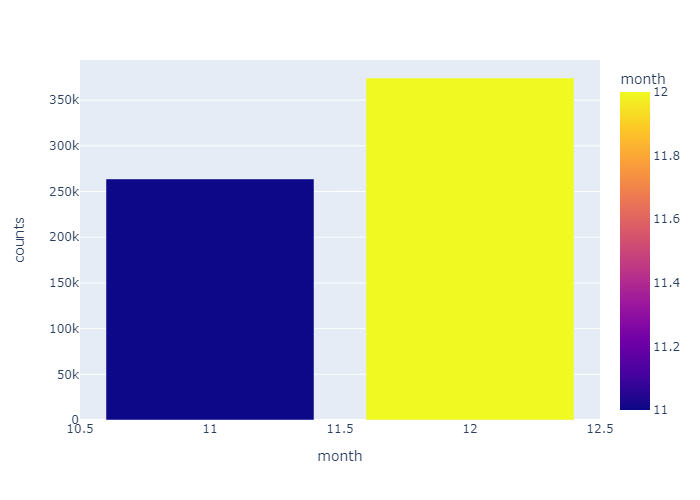

In [16]:
plot_bar('month')

It appears that we only have november and december in our month data. It means the data is only recorded or taken in november and december with december data dominating.

Day Data

    day  counts
0     1   41680
1     2   41298
2     3   41323
3     4   11627
4     9    1529
5    10    2534
6    13   35496
7    14   41344
8    15   41332
9    16   41359
10   17   41354
11   18   33329
12   26   29028
13   27   70135
14   28   67842
15   29   55222
16   30   41544


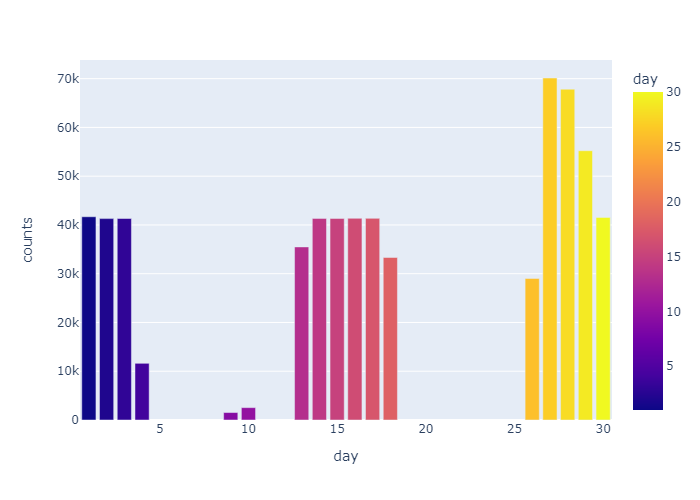

In [17]:
plot_bar('day')

It seems we have many gaps in our 'day' data. For example we don't have data from 18th day until 25th day in each month.

Hour Data

    hour  counts
0      0   29872
1      1   26310
2      2   26323
3      3   25530
4      4   26125
5      5   22995
6      6   25147
7      7   22930
8      8   22337
9      9   26673
10    10   27918
11    11   27946
12    12   28017
13    13   27977
14    14   27976
15    15   27868
16    16   27972
17    17   28075
18    18   27958
19    19   25410
20    20   24620
21    21   25549
22    22   27093
23    23   29355


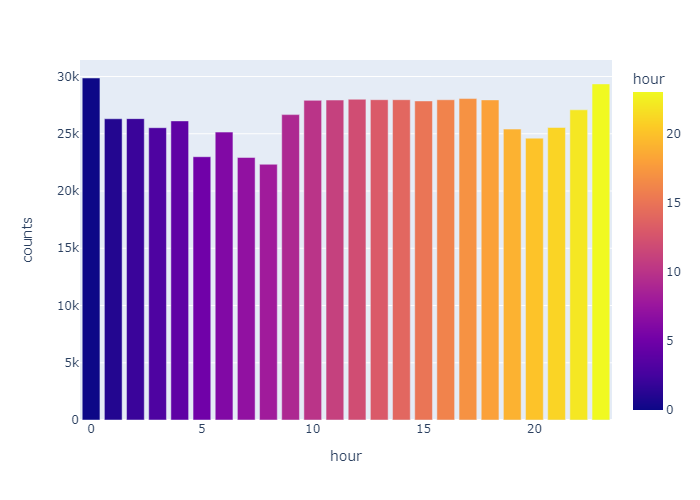

In [19]:
plot_bar('hour')

it seems like we have almost 24 hours recorded data!

Strip plots

<AxesSubplot:xlabel='price', ylabel='cab_type'>

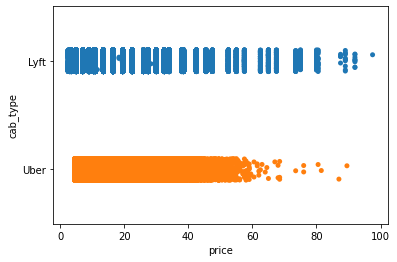

In [23]:
sns.stripplot(data=df,x='price',y='cab_type')

<AxesSubplot:xlabel='price', ylabel='icon'>

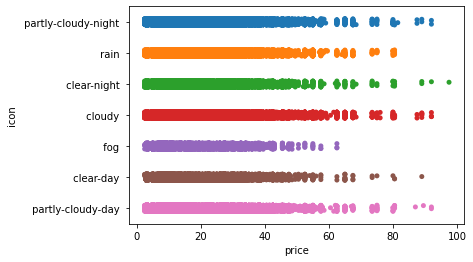

In [24]:
sns.stripplot(data=df, x='price', y='icon')

<AxesSubplot:xlabel='surge_multiplier', ylabel='source'>

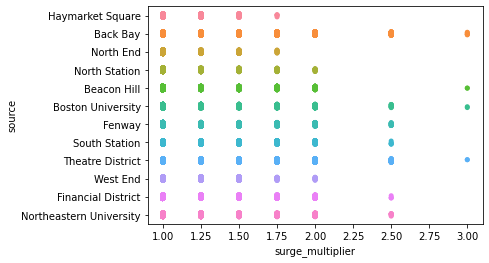

In [25]:
sns.stripplot(data=df, x='surge_multiplier', y='source')

<AxesSubplot:xlabel='surge_multiplier', ylabel='hour'>

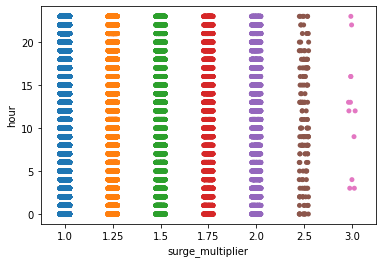

In [26]:
sns.stripplot(data=df, x='surge_multiplier', y='hour')

Converting Timestamp to Datetime value

In [27]:
df['timestamp'].head()

0    1.544953e+09
1    1.543284e+09
2    1.543367e+09
3    1.543554e+09
4    1.543463e+09
Name: timestamp, dtype: float64

In [28]:
from datetime import datetime
timestamp1 = 1544952608
timestamp2 = 1543284024
timestamp3 = 1543818483
timestamp4 = 1543594384
timestamp5 = 1544728504
dt_object1 = datetime.fromtimestamp(timestamp1)
dt_object2 = datetime.fromtimestamp(timestamp2)
dt_object3 = datetime.fromtimestamp(timestamp3)
dt_object4 = datetime.fromtimestamp(timestamp4)
dt_object5 = datetime.fromtimestamp(timestamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 04:30:08
dt_object = 2018-11-26 21:00:24
dt_object = 2018-12-03 01:28:03
dt_object = 2018-11-30 11:13:04
dt_object = 2018-12-13 14:15:04


So by this timestamp to datetime conversion we get to know that, our data is of the year 2018 and in the month of november and december only

Bar plots

<AxesSubplot:>

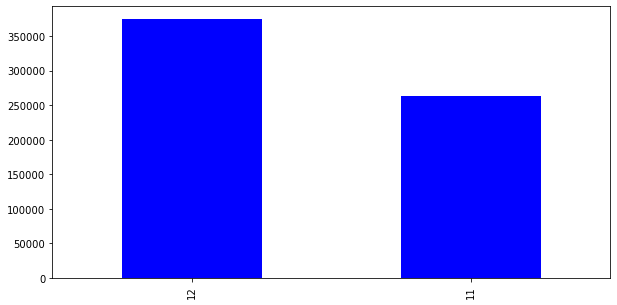

In [30]:
df['month'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')

<AxesSubplot:>

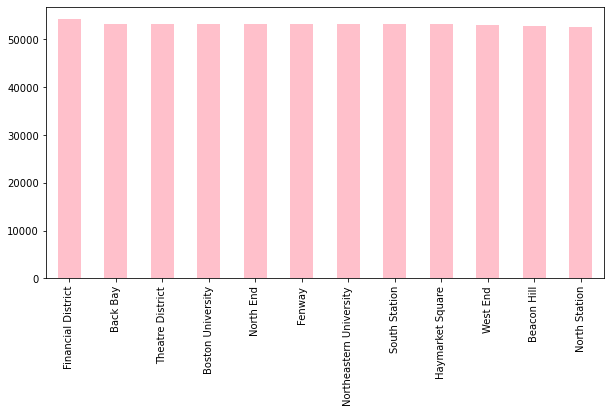

In [31]:
df['source'].value_counts().plot(kind='bar', figsize=(10,5), color='pink')

<AxesSubplot:>

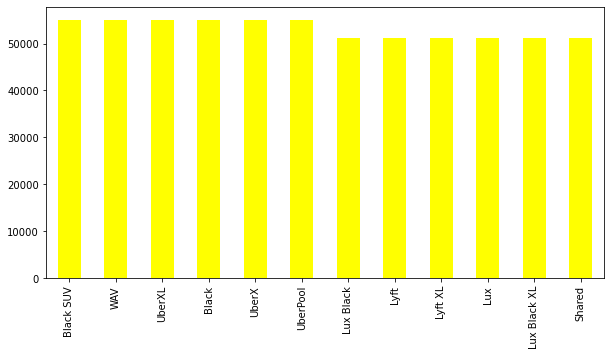

In [32]:
df['name'].value_counts().plot(kind='bar', figsize=(10,5), color='yellow')

<AxesSubplot:>

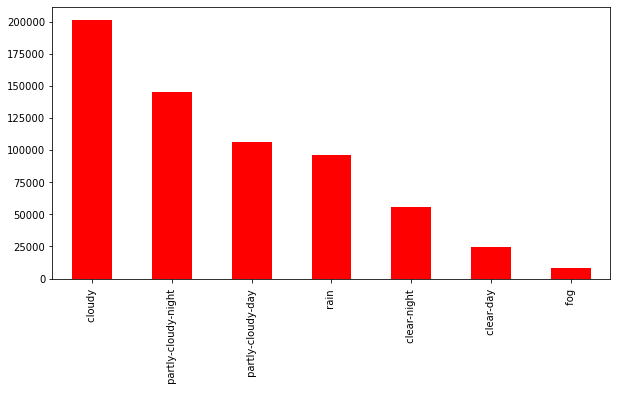

In [33]:
df['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='red')

<AxesSubplot:>

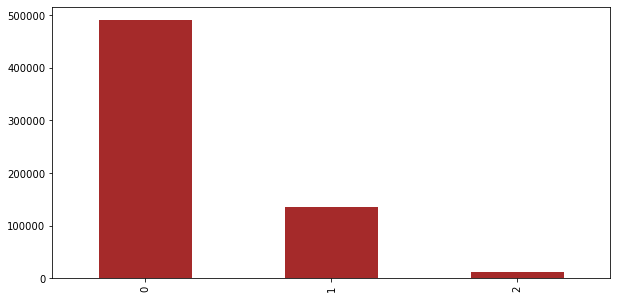

In [34]:
df['uvIndex'].value_counts().plot(kind='bar', figsize=(10,5), color='brown')

<AxesSubplot:>

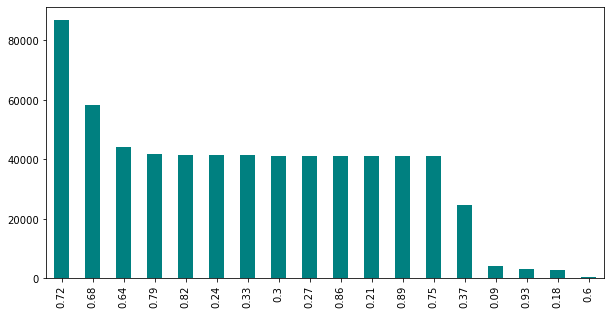

In [35]:
df['moonPhase'].value_counts().plot(kind='bar', figsize=(10,5), color='Teal')

<AxesSubplot:>

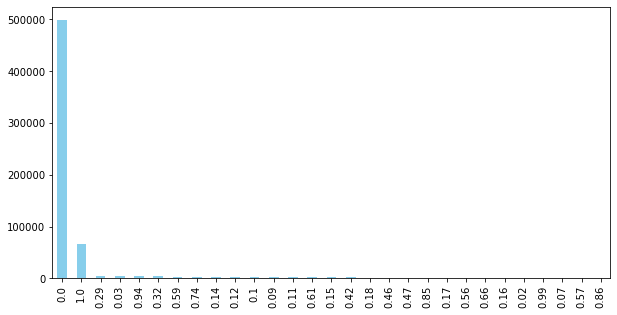

In [36]:
df['precipProbability'].value_counts().plot(kind='bar', figsize=(10,5), color='skyblue')

<AxesSubplot:xlabel='borough', ylabel='pickups'>

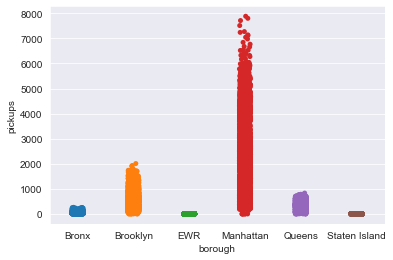

In [63]:
sns.stripplot(data=df1,x='borough',y='pickups')

In [64]:
df.corr()

timestamp      hour       day     month  \
timestamp                     1.000000 -0.028501 -0.341420  0.771245   
hour                         -0.028501  1.000000  0.066223 -0.079734   
day                          -0.341420  0.066223  1.000000 -0.861325   
month                         0.771245 -0.079734 -0.861325  1.000000   
price                         0.000808  0.000561 -0.000722  0.000913   
distance                      0.003290  0.002283 -0.000992  0.002402   
surge_multiplier              0.000611 -0.000067  0.001397 -0.000612   
latitude                      0.168295  0.019228  0.006744  0.085946   
longitude                    -0.136716 -0.005986  0.078539 -0.126763   
temperature                  -0.249027  0.218829 -0.083934 -0.082048   
apparentTemperature          -0.226472  0.198212 -0.223410  0.024773   
precipIntensity              -0.179834 -0.233246  0.091513 -0.154356   
precipProbability            -0.147351 -0.129631  0.030765 -0.097803   
humidity                     -0.167740 -0.275778 -0.093376 -0.022078   
windSpeed                    -0.066364  0.073011  0.440512 -0.334897   
windGust                      0.005565  0.077646  0.402611 -0.270541   
windGustTime                  0.998843 -0.028544 -0.336560  0.767339   
visibility                    0.158577  0.173776  0.105210  0.011129   
temperatureHigh              -0.228324  0.005191 -0.283410  0.068094   
temperatureHighTime           0.999332 -0.028323 -0.343251  0.772119   
temperatureLow               -0.366885  0.015000 -0.088370 -0.138703   
temperatureLowTime            0.999175 -0.027267 -0.333686  0.765551   
apparentTemperatureHigh      -0.215550  0.005518 -0.398099  0.152479   
apparentTemperatureHighTime   0.999312 -0.028481 -0.343422  0.772227   
apparentTemperatureLow       -0.402043  0.015722 -0.192984 -0.087019   
apparentTemperatureLowTime    0.999204 -0.027438 -0.335630  0.766883   
dewPoint                     -0.265512  0.004863 -0.101470 -0.074906   
pressure                      0.533074 -0.067787 -0.444738  0.589683   
windBearing                  -0.133853  0.036292  0.092226 -0.135317   
cloudCover                   -0.081522  0.026680 -0.041103 -0.016767   
uvIndex                      -0.025986  0.330326 -0.012083 -0.012340   
visibility.1                  0.158577  0.173776  0.105210  0.011129   
ozone                         0.196566  0.034035  0.376791 -0.149111   
sunriseTime                   0.999372 -0.028016 -0.341201  0.770749   
sunsetTime                    0.999372 -0.028014 -0.341145  0.770712   
moonPhase                    -0.846279  0.020997 -0.007038 -0.452655   
precipIntensityMax           -0.211887  0.020288  0.145789 -0.213301   
uvIndexTime                   0.999364 -0.027997 -0.341330  0.770832   
temperatureMin               -0.307194  0.015668  0.038089 -0.191928   
temperatureMinTime            0.998195 -0.027486 -0.334118  0.765319   
temperatureMax               -0.186495  0.002982 -0.304704  0.105113   
temperatureMaxTime            0.999290 -0.028479 -0.344669  0.773057   
apparentTemperatureMin       -0.378538  0.015882 -0.019878 -0.191293   
apparentTemperatureMinTime    0.998288 -0.028172 -0.335176  0.766097   
apparentTemperatureMax       -0.157891  0.002904 -0.444366  0.214928   
apparentTemperatureMaxTime    0.999276 -0.028273 -0.344546  0.772962   

                                price  distance  surge_multiplier  latitude  \
timestamp                    0.000808  0.003290          0.000611  0.168295   
hour                         0.000561  0.002283         -0.000067  0.019228   
day                         -0.000722 -0.000992          0.001397  0.006744   
month                        0.000913  0.002402         -0.000612  0.085946   
price                        1.000000  0.345061          0.240458  0.002088   
distance                     0.345061  1.000000          0.025946  0.000984   
surge_multiplier             0.240458  0.025946          1.000000  0.001471   
latitude    

In [65]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

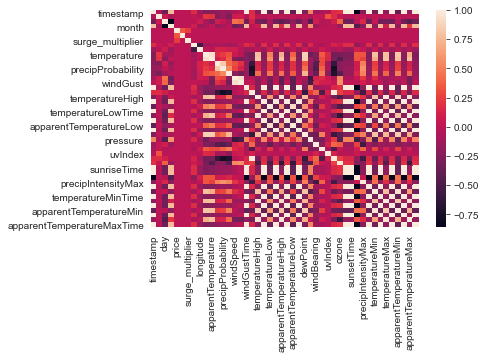

In [66]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
# plotting correlation heatmap
dataplot=sb.heatmap(df.corr())
  
# displaying heatmap
mp.show()

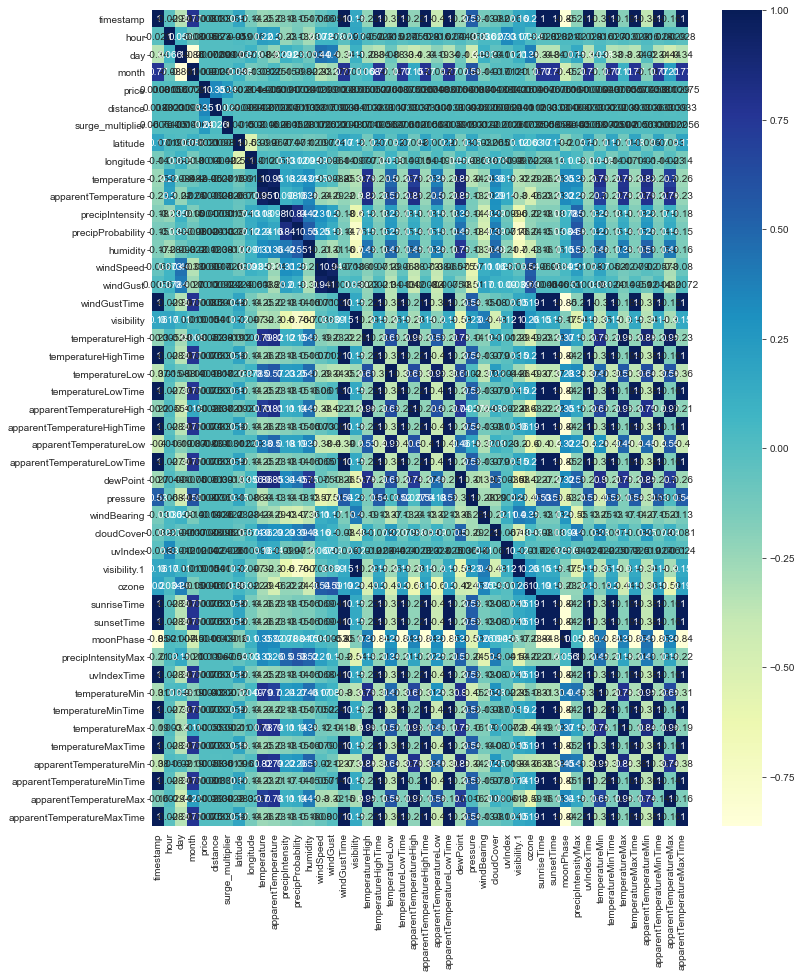

In [71]:
 # prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
#print(df.corr())
  
# plotting correlation heatmap
f = plt.figure(figsize=(12, 15))
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [72]:
import plotly.express as px
fig = px.imshow(df.corr())
fig.show()

In [73]:
import plotly.express as px
fig = px.imshow(df1.corr())
fig.show()

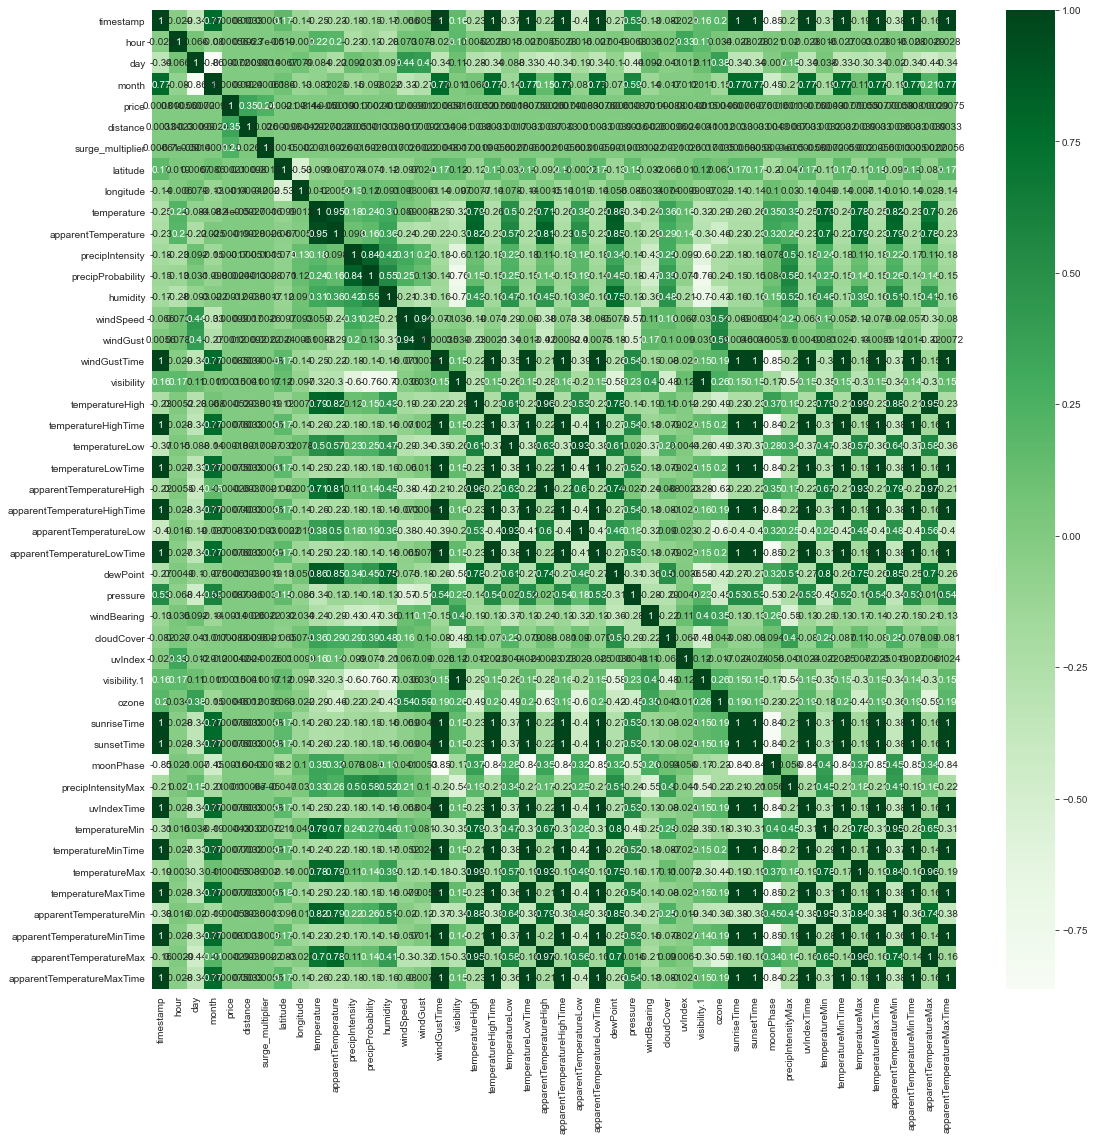

In [78]:
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

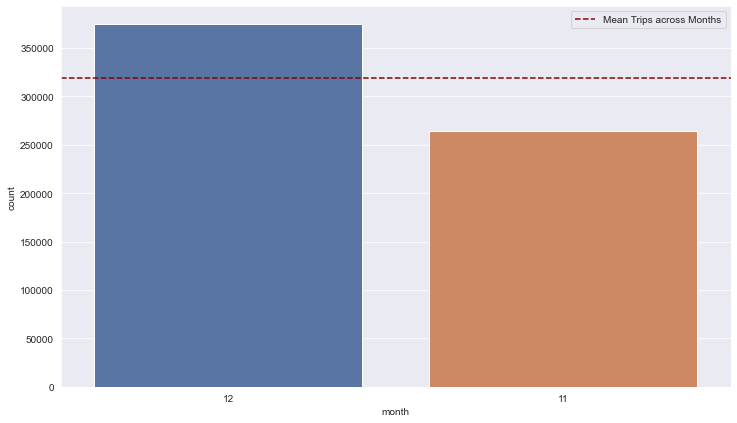

In [88]:
plt.figure(figsize=(12,7))
sns.countplot(df['month'], order = df['month'].value_counts().index, palette="deep")
plt.axhline(df['month'].value_counts().mean(),linestyle='--', color = 'darkred', label='Mean Trips across Months')
plt.legend()
plt.show()

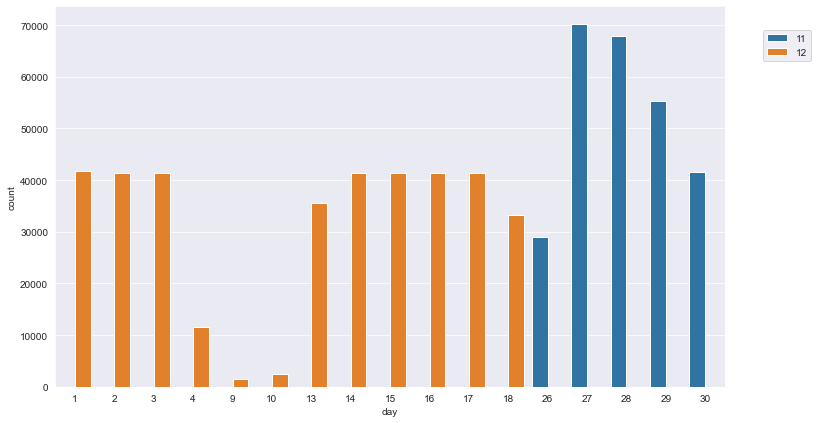

In [93]:
plt.figure(figsize=(12,7))
sns.countplot(df['time'],hue = df['month'])
plt.legend(bbox_to_anchor=(1.05, 0.95),loc=2)
plt.show()

Where do customers most frequently take cabs?

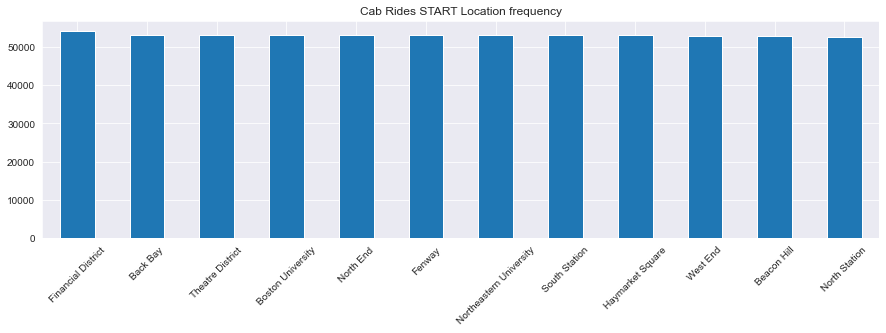

In [94]:
plt.figure(figsize=(15,4))
pd.Series(df['source']).value_counts()[:25].plot(kind="bar")
plt.title("Cab Rides START Location frequency")
plt.xticks(rotation = 45);

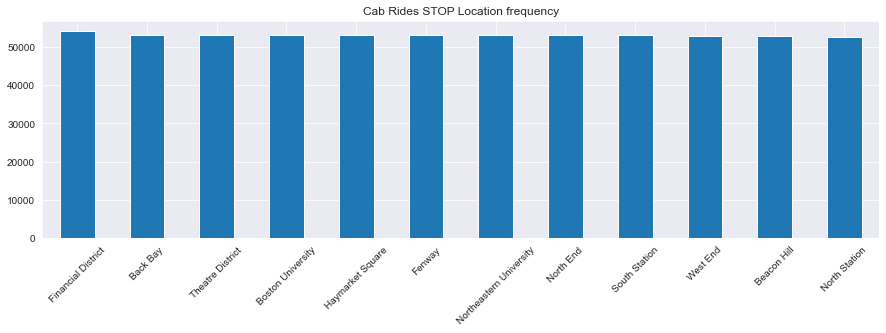

In [96]:
plt.figure(figsize=(15,4))
pd.Series(df['destination']).value_counts()[:25].plot(kind = "bar")
plt.title("Cab Rides STOP Location frequency")
plt.xticks(rotation = 45);

Diatnce(miles) Vs Fair price

In [83]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

---------------------------------------------------------------------------------------------------------------------------

In [37]:
# Function for Expanding DateTime to separate columns that can be #used for other data
def expand_date(df):    
    df['date'] = df['Date/Time'].dt.date
    df['month'] = df['Date/Time'].dt.month
    df['week'] = df['Date/Time'].dt.week
    df['MonthDayNum'] = df['Date/Time'].dt.day
    df['HourOfDay'] = df['Date/Time'].dt.hour
    df['DayOfWeekNum'] = df['Date/Time'].dt.dayofweek 
#on 'DayOfWeekNum', Monday=0, Tuesday=1, Wednesday=2,...,Sunday=6 
    df['DayOfWeek'] = df['Date/Time'].dt.day_name()
    
    return df

In [ ]:
print('Total trips: ', completed_rides.status.count())
print(completed_rides.year.value_counts().sort_index(ascending=True))
sns.countplot(data=completed_rides, x='year',order=['2016','2017','2018','2019','2020','2021'], palette='pastel');

In [61]:
!conda install -c conda-forge folium

^C


In [60]:
#Import libraries    
import numpy as np
import pandas as pd
import folium    
Latitude= 59.9111
Longitude= 10.7525

ModuleNotFoundError: No module named 'folium'

In [52]:


coord=[]
for lat,lng in zip(completed_rides.dropoff_lat.values,completed_rides.dropoff_lng.values):
    coord.append([lat,lng])
map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%', 
    height='50%',
    control_scale=True)
map.add_child(plugins.HeatMap(coord))
map

ModuleNotFoundError: No module named 'folim'